#### **Problem Statement:** Predict Apple stock closing price (Symbol: AAPL) in 2019 (before COVID) and 2021-2022 (after COVID)

*   **Method:** Compare between 2 strategies (1) EMA crossover, (2) simple buy sell method to determine success of prediction.
*   **Approach:** Obtain approximately 10 years of data (Source: AlphaVantage)
*   **Technical Analysis:** EMA 20 and 50 day cross over.
*   **Metric:** Measure return of investment (ROI) based on methods above for data in year 2019 (before COVID) and 2021-2022 (after COVID).









#### **Step 1:** Import all relevant libraries.

In [19]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Step 2:** Download AAPL stock data from AlphaVantage by calling an API, then extracting the "Time Series (Daily)" data and save it as a CSV file.

In [3]:
function = "TIME_SERIES_DAILY"
symbol = "AAPL"
apikey = "BCG1RN058ZTA77CE"

url = 'https://www.alphavantage.co/query?function={}&symbol={}&outputsize=full&apikey={}'.format(function,symbol,apikey)
r = requests.get(url)

data = r.json()

df_org = pd.DataFrame(data['Time Series (Daily)']).T

In [4]:
path = '/content/drive/MyDrive/10. Python Projects/GITHUB/Project 1/'
file_name = 'AAPL_Data.csv'
df_org.to_csv(path + file_name)

#### **Step 3:** Check and clean up current data set. Then, extract data from 2009 onwards.

In [5]:
df_org = df_org.apply(lambda s: pd.to_numeric(s, errors='coerce'))
df_org.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume      int64
dtype: object

In [6]:
df_org.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [7]:
df_org.index = pd.to_datetime(df_org.index)
type(df_org.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
df = df_org[(df_org.index >= '2009-01-01')]
df.sort_index(ascending = True, inplace = True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,1. open,2. high,3. low,4. close,5. volume
2009-01-02,85.880,91.040,85.160,90.75,26643400
2009-01-05,93.170,96.180,92.710,94.58,42200300
2009-01-06,95.950,97.170,92.390,93.02,46046800
2009-01-07,91.810,92.500,90.260,91.01,26894600
2009-01-08,90.430,93.150,90.040,92.70,24053600
...,...,...,...,...,...
2022-08-29,161.145,162.900,159.820,161.38,72724452
2022-08-30,162.130,162.560,157.720,158.91,77906197
2022-08-31,160.305,160.580,157.140,157.22,87991091
2022-09-01,156.640,158.420,154.670,157.96,74229896


#### **Step 4.** Apply EMA crossover strategy to buy and sell stocks.

For every day (i.e. each row), EMA_20 and EMA_50 is calculated based on the previous 20 and 50 days exponential moving average.
*   If EMA_20 > EMA_50 ▶ Indicates bullish sentiment, so use cash to buy as many shares as possible based on closing price
*   If EMA_20 < EMA_50 ▶ Indicates bearish sentiment, so sell all shares on hand based on closing price







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


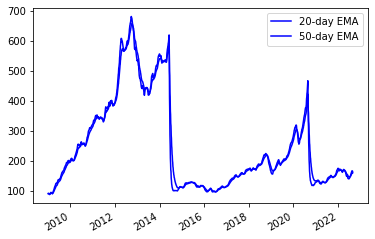

In [54]:
# Create 20 days exponential moving average column
df['EMA_20'] = df['4. close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
df['EMA_50'] = df['4. close'].ewm(span = 50, adjust = False).mean()

# Plot 20 vs 50-day EMA to visualize number of crossovers
df['EMA_20'].plot(color='blue', label = '20-day EMA')
df['EMA_50'].plot(color='blue', label = '50-day EMA')
plt.legend();

In [55]:
df.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
EMA_20       0
EMA_50       0
dtype: int64

##### Testing on 2019 / 2021 data:

*   For 2019 data: On the last day of 2019, sell all shares at closing price and calculate total **cash left on hand**.
*   For 2021 data: On the latest day in 2022, sell all shares at closing price and calculate total **cash left on hand**.





In [70]:
df_2019 = df[(df.index >= '2019-01-01') * (df.index < '2020-01-01')]
df_2021 = df[(df.index >= '2021-01-01')]

In [71]:
def EMA_strategy(df):

  shares = 0 # Assuming we have 0 shares to start with
  cash = 10000 # Money we have at the start

  for index, row in df.iterrows():

    # Buy
    if (row['EMA_20'] > row['EMA_50']) & (cash != 0) :
      shares_to_buy = math.floor(cash / row['4. close'])

      if shares_to_buy != 0:
        print('')
        print('Buy all shares if possible')
        print(index)
        cash -= shares_to_buy * row['4. close']
        shares += shares_to_buy
        print('Pricing of stock: ', row['4. close'])
        print('Bought qty of shares:', shares)
        print('Money spend on shares:', shares_to_buy * row['4. close'])
        print('Remaining cash', round(cash, 2))
        
    # Sell
    elif (row['EMA_20'] < row['EMA_50']) & (shares != 0) :
      print('')
      print('Sell all shares if possible')
      print(index)
      cash_from_shares = shares * row['4. close']
      print('Owned qty of shares: ', shares)
      print('Pricing of stock: ', row['4. close'])
      print('Cash from shares: ', cash_from_shares)
      cash += cash_from_shares
      print('Total cash after selling: ',cash)
      shares = 0

    else:
      pass

  cash_from_shares = row['4. close']* shares
  cash += cash_from_shares
  print('Total cash left: ', round(cash,2))
  return cash

In [72]:
cash_2019 = EMA_strategy(df_2019)


Buy all shares if possible
2019-02-25 00:00:00
Pricing of stock:  174.23
Bought qty of shares: 57
Money spend on shares: 9931.109999999999
Remaining cash 68.89

Sell all shares if possible
2019-05-24 00:00:00
Owned qty of shares:  57
Pricing of stock:  178.97
Cash from shares:  10201.289999999999
Total cash after selling:  10270.18

Buy all shares if possible
2019-06-18 00:00:00
Pricing of stock:  198.45
Bought qty of shares: 51
Money spend on shares: 10120.949999999999
Remaining cash 149.23
Total cash left:  15125.38


In [73]:
cash_2021 = EMA_strategy(df_2021)


Buy all shares if possible
2021-01-27 00:00:00
Pricing of stock:  142.06
Bought qty of shares: 70
Money spend on shares: 9944.2
Remaining cash 55.8

Sell all shares if possible
2021-02-19 00:00:00
Owned qty of shares:  70
Pricing of stock:  129.87
Cash from shares:  9090.9
Total cash after selling:  9146.699999999999

Buy all shares if possible
2021-04-14 00:00:00
Pricing of stock:  132.03
Bought qty of shares: 69
Money spend on shares: 9110.07
Remaining cash 36.63

Sell all shares if possible
2021-05-14 00:00:00
Owned qty of shares:  69
Pricing of stock:  127.45
Cash from shares:  8794.050000000001
Total cash after selling:  8830.68

Buy all shares if possible
2021-06-17 00:00:00
Pricing of stock:  131.79
Bought qty of shares: 67
Money spend on shares: 8829.93
Remaining cash 0.75

Sell all shares if possible
2021-10-04 00:00:00
Owned qty of shares:  67
Pricing of stock:  139.14
Cash from shares:  9322.38
Total cash after selling:  9323.13

Buy all shares if possible
2021-10-21 00:00:

#### **Step 5.** Using Machine Learning, train model (i.e. Random Forest Regressor) to execute the simple buy sell strategy.

For every day (i.e. each row):
*   If today's opening price > yesterday's closing price ▶ Use cash to buy as many shares as possible based on closing price
*   If today's opening price < yesterday's closing price  ▶ Sell all shares on hand based on closing price

In [132]:
df_new = df_org
df_new.sort_index(ascending = True, inplace = True)

In [133]:
df_new['days_of_week'] = df_new.index.weekday
df_new['days_of_month'] = df_new.index.day
df_new['months_of_year'] = df_new.index.month

In [134]:
# Dummification of data
days_of_week = pd.get_dummies((df_new['days_of_week']), prefix = 'days_of_week')
days_of_month = pd.get_dummies((df_new['days_of_month']), prefix = 'days_of_month')
months_of_year = pd.get_dummies((df_new['months_of_year']), prefix = 'months_of_year')

data = [days_of_week, days_of_month, months_of_year]
df_dummy = pd.concat(data, axis = 1)

df_data_req = df_new[['1. open', '4. close', '5. volume']]
df_ml = pd.concat([df_data_req, df_dummy], axis = 1)
df_ml

,1. open,4. close,5. volume,days_of_week_0,days_of_week_1,days_of_week_2,days_of_week_3,days_of_week_4,days_of_month_1,days_of_month_2,...,months_of_year_3,months_of_year_4,months_of_year_5,months_of_year_6,months_of_year_7,months_of_year_8,months_of_year_9,months_of_year_10,months_of_year_11,months_of_year_12
1999-11-01,80.000,77.62,2487300,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1999-11-02,78.000,80.25,3564600,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1999-11-03,81.620,81.50,2932700,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1999-11-04,82.060,83.62,3384700,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1999-11-05,84.620,88.31,3721500,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,161.145,161.38,72724452,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-08-30,162.130,158.91,77906197,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-08-31,160.305,157.22,87991091,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-09-01,156.640,157.96,74229896,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
df_ml.to_csv(path + 'Dummy_Data.csv')

In [136]:
target = '4. close'
X = df_ml[df_ml.columns.difference([target])] # Independent variable
y = df_ml[[target]] # Dependent variable

In [151]:
#Import relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

*   ##### Testing on 2019 / 2021 data:

*   For 2019 data: On the last day of 2019, sell all shares at closing price and calculate total **cash left on hand**.
*   For 2021 data: On the latest day in 2022, sell all shares at closing price and calculate total **cash left on hand**.



In [138]:
X_train_2019 = X[X.index < '2019-01-01']
X_test_2019 = X[(X.index >= '2019-01-01') &(X.index < '2020-01-01')]
y_train_2019 = y[y.index < '2019-01-01']
y_test_2019 = y[(X.index >= '2019-01-01') &(X.index < '2020-01-01')]

X_train_2019.shape, X_test_2019.shape, y_train_2019.shape, y_test_2019.shape

((4822, 50), (252, 50), (4822, 1), (252, 1))

In [139]:
X_train_2021 = X[X.index < '2021-01-01']
X_test_2021 = X[(X.index >= '2021-01-01')]
y_train_2021 = y[y.index < '2021-01-01']
y_test_2021 = y[(X.index >= '2021-01-01')]

X_train_2021.shape, X_test_2021.shape, y_train_2021.shape, y_test_2021.shape

((5327, 50), (421, 50), (5327, 1), (421, 1))

In [140]:
def run_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(np.sqrt(mean_squared_error(y_test, y_pred)))

    plt.scatter(X_test.index, y_pred)
    plt.scatter(X_test.index, y_test)

    return y_pred, model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


2.6197507607433566


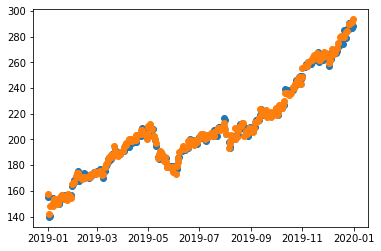

In [141]:
#Run RandomForestRegressor model for 2019 data
model_rfr = RandomForestRegressor()
y_pred_rfr, model_rfr = run_model(model_rfr, X_train_2019, y_train_2019, X_test_2019, y_test_2019)

In [142]:
y_test_2019['y_pred'] = y_pred_rfr
y_test_2019['open'] = X_test_2019['1. open']
y_test_2019.columns = ['close', 'y_pred_close', 'open']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


3.6861323894450813


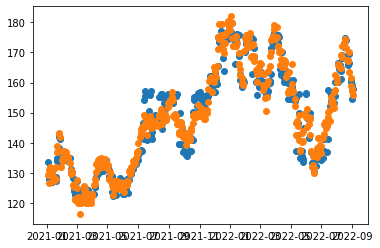

In [143]:
#Run RandomForestRegressor model for 2021 data
model_rfr = RandomForestRegressor()
y_pred_rfr, model_rfr = run_model(model_rfr, X_train_2021, y_train_2021, X_test_2021, y_test_2021)

In [144]:
y_test_2021['y_pred'] = y_pred_rfr
y_test_2021['open'] = X_test_2021['1. open']
y_test_2021.columns = ['close', 'y_pred_close', 'open']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
def buy_sell_strategy (y_test):

  cash_after_selling =[]
  cash = 10000
  shares = 0
  for count, i in enumerate(y_test.index.tolist()):
    open_price = y_test.loc[i,'open']
    
    y_pred = y_test.loc[i,'y_pred_close']

    if count == 0: ytd_close = y_test.loc[y_test.index[count],'open']
    
    else:
      ytd_close = y_test.loc[y_test.index[count-1],'close']
    
    # Believe that pricing will head up so buy if possible or else hold
    if ((y_pred > ytd_close) & (cash != 0)):
      shares_to_buy = math.floor(cash / open_price)

      if shares_to_buy !=0:
        print('')
        print('Buying all shares if possible')
        print('Current cash',round(cash,2))

        print(i)
        cash -= shares_to_buy*open_price
        shares += shares_to_buy
        print('pricing of stock: ',open_price)
        print('Predict closing price of stock : ',y_pred)
        print('Bought number of shares:',shares )
        print('Money spend on Shares:',shares_to_buy*open_price )
        print('remaining cash',round(cash,2))
    
    # Believe that pricing will drop so sell if possible, convert to cash
    elif ((ytd_close > y_pred )  & (shares != 0)):
        print('')
        print('Selling all shares if possible')
        print(i)
        cash_from_shares = shares*open_price
        print('Number of shares: ',shares)
        print('opening pricing of stock: ',open_price)
        print('Cash from shares: ',cash_from_shares)
        cash += cash_from_shares
        print('Total Cash after Selling: ',cash)
        shares = 0
        cash_after_selling.append([i,cash])

    else:
      pass

  print('')
  cash_from_shares = open_price* shares
  cash += cash_from_shares
  print('Total Cash left: ',cash)

  return cash_after_selling

In [146]:
cash_after_selling_2019 = buy_sell_strategy(y_test_2019)


Buying all shares if possible
Current cash 10000
2019-01-02 00:00:00
pricing of stock:  154.89
Predict closing price of stock :  155.27663
Bought number of shares: 64
Money spend on Shares: 9912.96
remaining cash 87.04

Selling all shares if possible
2019-01-03 00:00:00
Number of shares:  64
opening pricing of stock:  143.98
Cash from shares:  9214.72
Total Cash after Selling:  9301.76

Buying all shares if possible
Current cash 9301.76
2019-01-07 00:00:00
pricing of stock:  148.7
Predict closing price of stock :  154.57090000000002
Bought number of shares: 62
Money spend on Shares: 9219.4
remaining cash 82.36

Selling all shares if possible
2019-01-10 00:00:00
Number of shares:  62
opening pricing of stock:  152.5
Cash from shares:  9455.0
Total Cash after Selling:  9537.36

Buying all shares if possible
Current cash 9537.36
2019-01-18 00:00:00
pricing of stock:  157.5
Predict closing price of stock :  156.89351999999982
Bought number of shares: 60
Money spend on Shares: 9450.0
remai

In [147]:
cash_after_selling_2021 = buy_sell_strategy(y_test_2021)


Buying all shares if possible
Current cash 10000
2021-01-04 00:00:00
pricing of stock:  133.52
Predict closing price of stock :  133.69275800000003
Bought number of shares: 74
Money spend on Shares: 9880.480000000001
remaining cash 119.52

Selling all shares if possible
2021-01-05 00:00:00
Number of shares:  74
opening pricing of stock:  128.89
Cash from shares:  9537.859999999999
Total Cash after Selling:  9657.379999999997

Buying all shares if possible
Current cash 9657.38
2021-01-07 00:00:00
pricing of stock:  128.36
Predict closing price of stock :  128.86555000000004
Bought number of shares: 75
Money spend on Shares: 9627.000000000002
remaining cash 30.38

Selling all shares if possible
2021-01-11 00:00:00
Number of shares:  75
opening pricing of stock:  129.19
Cash from shares:  9689.25
Total Cash after Selling:  9719.629999999996

Buying all shares if possible
Current cash 9719.63
2021-01-19 00:00:00
pricing of stock:  127.78
Predict closing price of stock :  127.3972500000000

In [148]:
def plot_chart(cash_after_selling, y_test):
  
  df_input = pd.DataFrame(cash_after_selling)
  df_input.columns = ['index', 'cash']
  df_input.set_index('index', inplace = True)

  df_new = pd.concat([y_test,df_input], axis = 1 )
  df_new['cash'] = df_new['cash'].ffill()
  df_new['open'] = df_new['open'].ffill()

  ax1 = y_test['open'].plot(style = 'b')
  ax2 = df_new['cash'].plot(secondary_y = True, style = 'g')

  ax1.set_ylabel('open price in USD', color='b')
  ax2.set_ylabel('cash in USD', color='g')

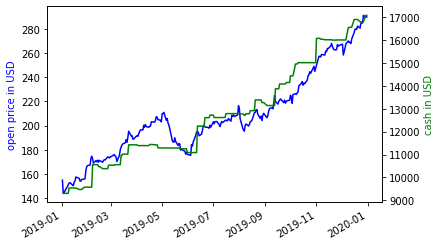

In [149]:
plot_chart(cash_after_selling_2019, y_test_2019)

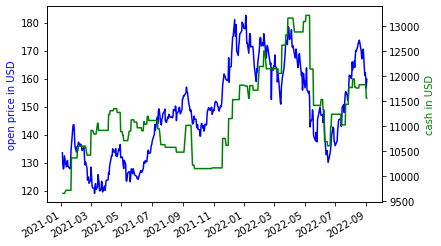

In [150]:
plot_chart(cash_after_selling_2021, y_test_2021)

#### **Conclusion:** Random Forest Regressor model performed better in both 2019 (bull market) and 2021 (bear market) as compared to EMA crossover strategy.